# California Population Data Ingestion (2000-2025)

**Dataset**: CA Department of Finance E-4 Population Estimates  
**Date Range**: 2000 - 2025 (26 years)  
**Source**: [CA Dept of Finance - Population Estimates](https://dof.ca.gov/forecasting/demographics/estimates/)

**Objective**: 
- Load merged county-level population data (2000-2025)
- Validate data quality and completeness
- Analyze population trends across California counties
- Prepare data for ML model integration

**Data Processing Note**:  
This dataset was created by downloading and merging 3 separate Excel files from CA Dept of Finance:
-  (2000-2010)
-  (2011-2020)
-  (2021-2025)

Each file contained "Table 1 County State" with county-level population estimates. The files were manually cleaned, merged, and saved as .

## Why Population Data Matters for Fire Prediction

Population data is crucial for understanding **human-caused wildfire risk** and **impact assessment**.

### **1. Human Fire Causes** 🔥
- **90-95% of wildfires** in California are human-caused (power lines, campfires, arson, equipment)
  - Source: *International Journal of Wildland Fire* (2023): 90%+ of ignitions from 1980-2020 were human-caused
  - Source: *Scientific American* (2023): 95% of California wildfires are human-caused
  - Source: *PBS NewsHour* (2023): Human activities responsible for 90-95% of CA wildfires
- **Higher population density** = more ignition sources
- **Urban-wildland interface (WUI)**: Where people meet fire-prone vegetation
- **Development patterns**: New housing in fire-prone areas increases risk

### **2. Wildland-Urban Interface (WUI)** 🏘️
- **WUI zones**: Areas where homes are built near wildlands
- **Highest risk areas**: Suburban sprawl into forests, grasslands, chaparral
- **Population growth**: More people moving to scenic but fire-prone areas
- **January 2025 fires**: Palisades and Eaton fires burned through dense WUI neighborhoods

### **3. Fire Suppression Resources** 🚒
- **Resource allocation**: CAL FIRE stations located based on population density
- **Response time**: More populated areas get faster response
- **Evacuation planning**: Population size determines evacuation routes and shelters
- **Emergency services**: Hospitals, fire stations, police scaled to population

### **4. Economic Impact** 💰
- **Property damage**: More people = more homes at risk
- **Insurance costs**: Population density affects insurance rates
- **Infrastructure**: Power lines, gas lines, water systems in populated areas
- **Business disruption**: Fires near cities cause massive economic losses

### **5. Predictive Power** 🎯
- **Risk zones**: High population + high fire weather = extreme risk
- **Historical patterns**: Population growth correlates with increased fire incidents
- **Future risk**: Projecting where people will live helps predict future fire risk
- **Targeted warnings**: Population data enables location-specific alerts

### **Key Insight for ML:**
The January 2025 Palisades fire burned through Pacific Palisades (population ~25,000) and the Eaton fire threatened Altadena/Pasadena (population ~200,000+). By incorporating population density into our model, we can identify high-risk WUI areas where fires would have the most devastating human impact—enabling targeted prevention and faster evacuation.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## 1. Load Merged Population Data

### Dataset Structure

The merged dataset has the following structure:
- **Rows**: 58 California counties
- **Columns**: COUNTY (name) + 26 year columns (2000-2025)
- **Values**: Total population for each county in each year

#### Data Sources:
1. **2000-2010**: [E-4 Historical Population Estimates](https://dof.ca.gov/forecasting/demographics/estimates/)
2. **2011-2020**: [E-4 Population Estimates 2011-2020](https://dof.ca.gov/forecasting/demographics/estimates/)
3. **2021-2025**: [E-4 Population Estimates 2021-2025](https://dof.ca.gov/forecasting/demographics/estimates/)

#### Methodology:
- **Housing Unit Method (HUM)**: Estimates based on housing units, occupancy rates, and household size
- **Vital Statistics**: Births, deaths, and migration data
- **Census Benchmarks**: 2000, 2010, and 2020 Census used for calibration

In [22]:
# Load the merged population data
data_dir = Path('../data/raw/population/')
pop_file = data_dir / 'california-counties-population-2000-2025.csv'

print('Loading California county population data (2000-2025)...')
print('=' * 60)

# Load CSV with comma thousands separator
df_population = pd.read_csv(pop_file, thousands=',')

# Clean county names (remove extra spaces)
df_population['COUNTY'] = df_population['COUNTY'].str.strip()

print(f'✅ Loaded {len(df_population)} California counties')
print(f'✅ Years covered: {len(df_population.columns) - 1} years (2000-2025)')

print('' + '=' * 60)
print('Data loaded successfully!')
print(f'Dataset shape: {df_population.shape}')
print(f'Columns: {list(df_population.columns[:6])}... (showing first 6)')

print('First 5 counties:')
df_population.head()

Loading California county population data (2000-2025)...
✅ Loaded 58 California counties
✅ Years covered: 27 years (2000-2025)
Data loaded successfully!
Dataset shape: (58, 28)
Columns: ['COUNTY', '2000', '2001', '2002', '2003', '2004']... (showing first 6)
First 5 counties:


,COUNTY,2000,2001,2002,2003,2004,2005,2006,2007,2008,2008.1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Alameda,1443939,1457185,1467063,1467892,1466407,1462736,1462371,1470622,1484085,1497799,1509240,1510271,1549193,1575139,1597747,1622205,1641983,1656919,1666247,1675964,1681337,1682353,1669095,1648467,1657334,1658061,1662482
1,Alpine,1208,1220,1242,1248,1257,1237,1232,1252,1228,1194,1178,1175,1176,1180,1185,1190,1196,1201,1205,1201,1204,1204,1195,1191,1184,1182,1177
2,Amador,35100,35495,36159,36656,36961,37434,37843,38025,37975,37884,38011,38091,37272,37044,37089,37453,37663,38807,39708,40227,40426,40474,40112,40148,39917,39972,39563
3,Butte,203171,204591,206942,209389,211419,212955,214690,216401,217801,218887,219967,220000,222623,224391,225737,227400,228198,230412,231774,227263,216090,211632,207814,206762,206884,207873,207525
4,Calaveras,40554,41042,41773,42651,43554,44348,45044,45477,45670,45632,45602,45578,45544,45499,45461,45395,45402,45355,45367,45324,45290,45292,45250,45012,44890,44824,44722


In [23]:
# Drop '2008.1' column and modify the DataFrame in place
df_population.drop('2008.1', axis=1, inplace=True)
df_population.head()


,COUNTY,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Alameda,1443939,1457185,1467063,1467892,1466407,1462736,1462371,1470622,1484085,1509240,1510271,1549193,1575139,1597747,1622205,1641983,1656919,1666247,1675964,1681337,1682353,1669095,1648467,1657334,1658061,1662482
1,Alpine,1208,1220,1242,1248,1257,1237,1232,1252,1228,1178,1175,1176,1180,1185,1190,1196,1201,1205,1201,1204,1204,1195,1191,1184,1182,1177
2,Amador,35100,35495,36159,36656,36961,37434,37843,38025,37975,38011,38091,37272,37044,37089,37453,37663,38807,39708,40227,40426,40474,40112,40148,39917,39972,39563
3,Butte,203171,204591,206942,209389,211419,212955,214690,216401,217801,219967,220000,222623,224391,225737,227400,228198,230412,231774,227263,216090,211632,207814,206762,206884,207873,207525
4,Calaveras,40554,41042,41773,42651,43554,44348,45044,45477,45670,45602,45578,45544,45499,45461,45395,45402,45355,45367,45324,45290,45292,45250,45012,44890,44824,44722


## 2. Data Quality Check

In [24]:
# Check for missing values
print('=' * 80)
print('DATA QUALITY ASSESSMENT')
print('=' * 80)

print(f'📊 Dataset Overview:')
print(f'   Total counties: {len(df_population)}')
print(f'   Expected counties: 58 (all CA counties)')
print(f'   Total years: {len(df_population.columns) - 1}')
print(f'   Total data points: {(len(df_population.columns) - 1) * len(df_population):,}')

# Check for missing values
missing_values = df_population.isnull().sum().sum()
print(f'❓ Missing Values:')
print(f'   Total missing: {missing_values}')
print(f'   Completeness: {((1 - missing_values / (df_population.shape[0] * df_population.shape[1])) * 100):.2f}%')

if missing_values > 0:
    print(f'Missing by year:')
    for col in df_population.columns:
        if df_population[col].isnull().sum() > 0:
            print(f'   {col}: {df_population[col].isnull().sum()} counties')

# Check data types
print(f'📋 Data Types:')
print(f'   COUNTY column: {df_population["COUNTY"].dtype}')
print(f'   Year columns: {df_population.iloc[:, 1].dtype}')

# Summary statistics
print(f'📈 Population Statistics (across all years):')
year_cols = [col for col in df_population.columns if col != 'COUNTY']
all_populations = df_population[year_cols].values.flatten()
print(f'   Min population: {np.min(all_populations):,.0f}')
print(f'   Max population: {np.max(all_populations):,.0f}')
print(f'   Mean population: {np.mean(all_populations):,.0f}')
print(f'   Median population: {np.median(all_populations):,.0f}')

print('' + '=' * 80)

DATA QUALITY ASSESSMENT
📊 Dataset Overview:
   Total counties: 58
   Expected counties: 58 (all CA counties)
   Total years: 26
   Total data points: 1,508
❓ Missing Values:
   Total missing: 0
   Completeness: 100.00%
📋 Data Types:
   COUNTY column: object
   Year columns: int64
📈 Population Statistics (across all years):
   Min population: 1,175
   Max population: 10,107,841
   Mean population: 649,647
   Median population: 180,640


## 3. Reshape Data to Long Format for ML Model

In [25]:
# Reshape population data from wide to long format
print('=' * 80)
print('RESHAPING POPULATION DATA TO LONG FORMAT')
print('=' * 80)

# Get year columns (exclude COUNTY column)
year_cols = [col for col in df_population.columns if col != 'COUNTY']

print(f'📊 Current format (wide): {df_population.shape}')
print(f'   Rows: {df_population.shape[0]} counties')
print(f'   Columns: {df_population.shape[1]} (1 county + {len(year_cols)} years)')

# Reshape to long format using melt
population_long = pd.melt(
    df_population,
    id_vars=['COUNTY'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Population'
)

# Convert Year to integer
population_long['Year'] = population_long['Year'].astype(int)

# Sort by County and Year
population_long = population_long.sort_values(['COUNTY', 'Year']).reset_index(drop=True)

print(f'✅ Reshaped format (long): {population_long.shape}')
print(f'   Rows: {population_long.shape[0]:,} county-year combinations')
print(f'   Columns: {population_long.shape[1]} (County, Year, Population)')

# Show sample of reshaped data
print(f'📋 Sample of reshaped data:')
print(population_long.head(10))

# Save to CSV
output_dir = Path('../data/processed')
output_dir.mkdir(parents=True, exist_ok=True)

output_file = output_dir / 'population_data_long_format_2000_2025.csv'
population_long.to_csv(output_file, index=False)

print(f'💾 Saved to: {output_file}')
print(f'   File size: {output_file.stat().st_size / (1024*1024):.2f} MB')

# Verify the data
print(f'✅ Data verification:')
print(f'   Unique counties: {population_long["COUNTY"].nunique()}')
print(f'   Year range: {population_long["Year"].min()}-{population_long["Year"].max()}')
print(f'   Total records: {len(population_long):,}')
print(f'   Expected records: {population_long["COUNTY"].nunique()} counties × {population_long["Year"].nunique()} years = {population_long["COUNTY"].nunique() * population_long["Year"].nunique():,}')

print(f'🎯 Population data ready for ML model merging!')
print('=' * 80)

RESHAPING POPULATION DATA TO LONG FORMAT
📊 Current format (wide): (58, 27)
   Rows: 58 counties
   Columns: 27 (1 county + 26 years)
✅ Reshaped format (long): (1508, 3)
   Rows: 1,508 county-year combinations
   Columns: 3 (County, Year, Population)
📋 Sample of reshaped data:
    COUNTY  Year  Population
0  Alameda  2000     1443939
1  Alameda  2001     1457185
2  Alameda  2002     1467063
3  Alameda  2003     1467892
4  Alameda  2004     1466407
5  Alameda  2005     1462736
6  Alameda  2006     1462371
7  Alameda  2007     1470622
8  Alameda  2008     1484085
9  Alameda  2009     1509240
💾 Saved to: ../data/processed/population_data_long_format_2000_2025.csv
   File size: 0.03 MB
✅ Data verification:
   Unique counties: 58
   Year range: 2000-2025
   Total records: 1,508
   Expected records: 58 counties × 26 years = 1,508
🎯 Population data ready for ML model merging!


In [29]:
population_long.head()

,COUNTY,Year,Population
0,Alameda,2000,1443939
1,Alameda,2001,1457185
2,Alameda,2002,1467063
3,Alameda,2003,1467892
4,Alameda,2004,1466407


## 4. Visualizations Using Long Format Data

POPULATION DATA VISUALIZATIONS (LONG FORMAT)


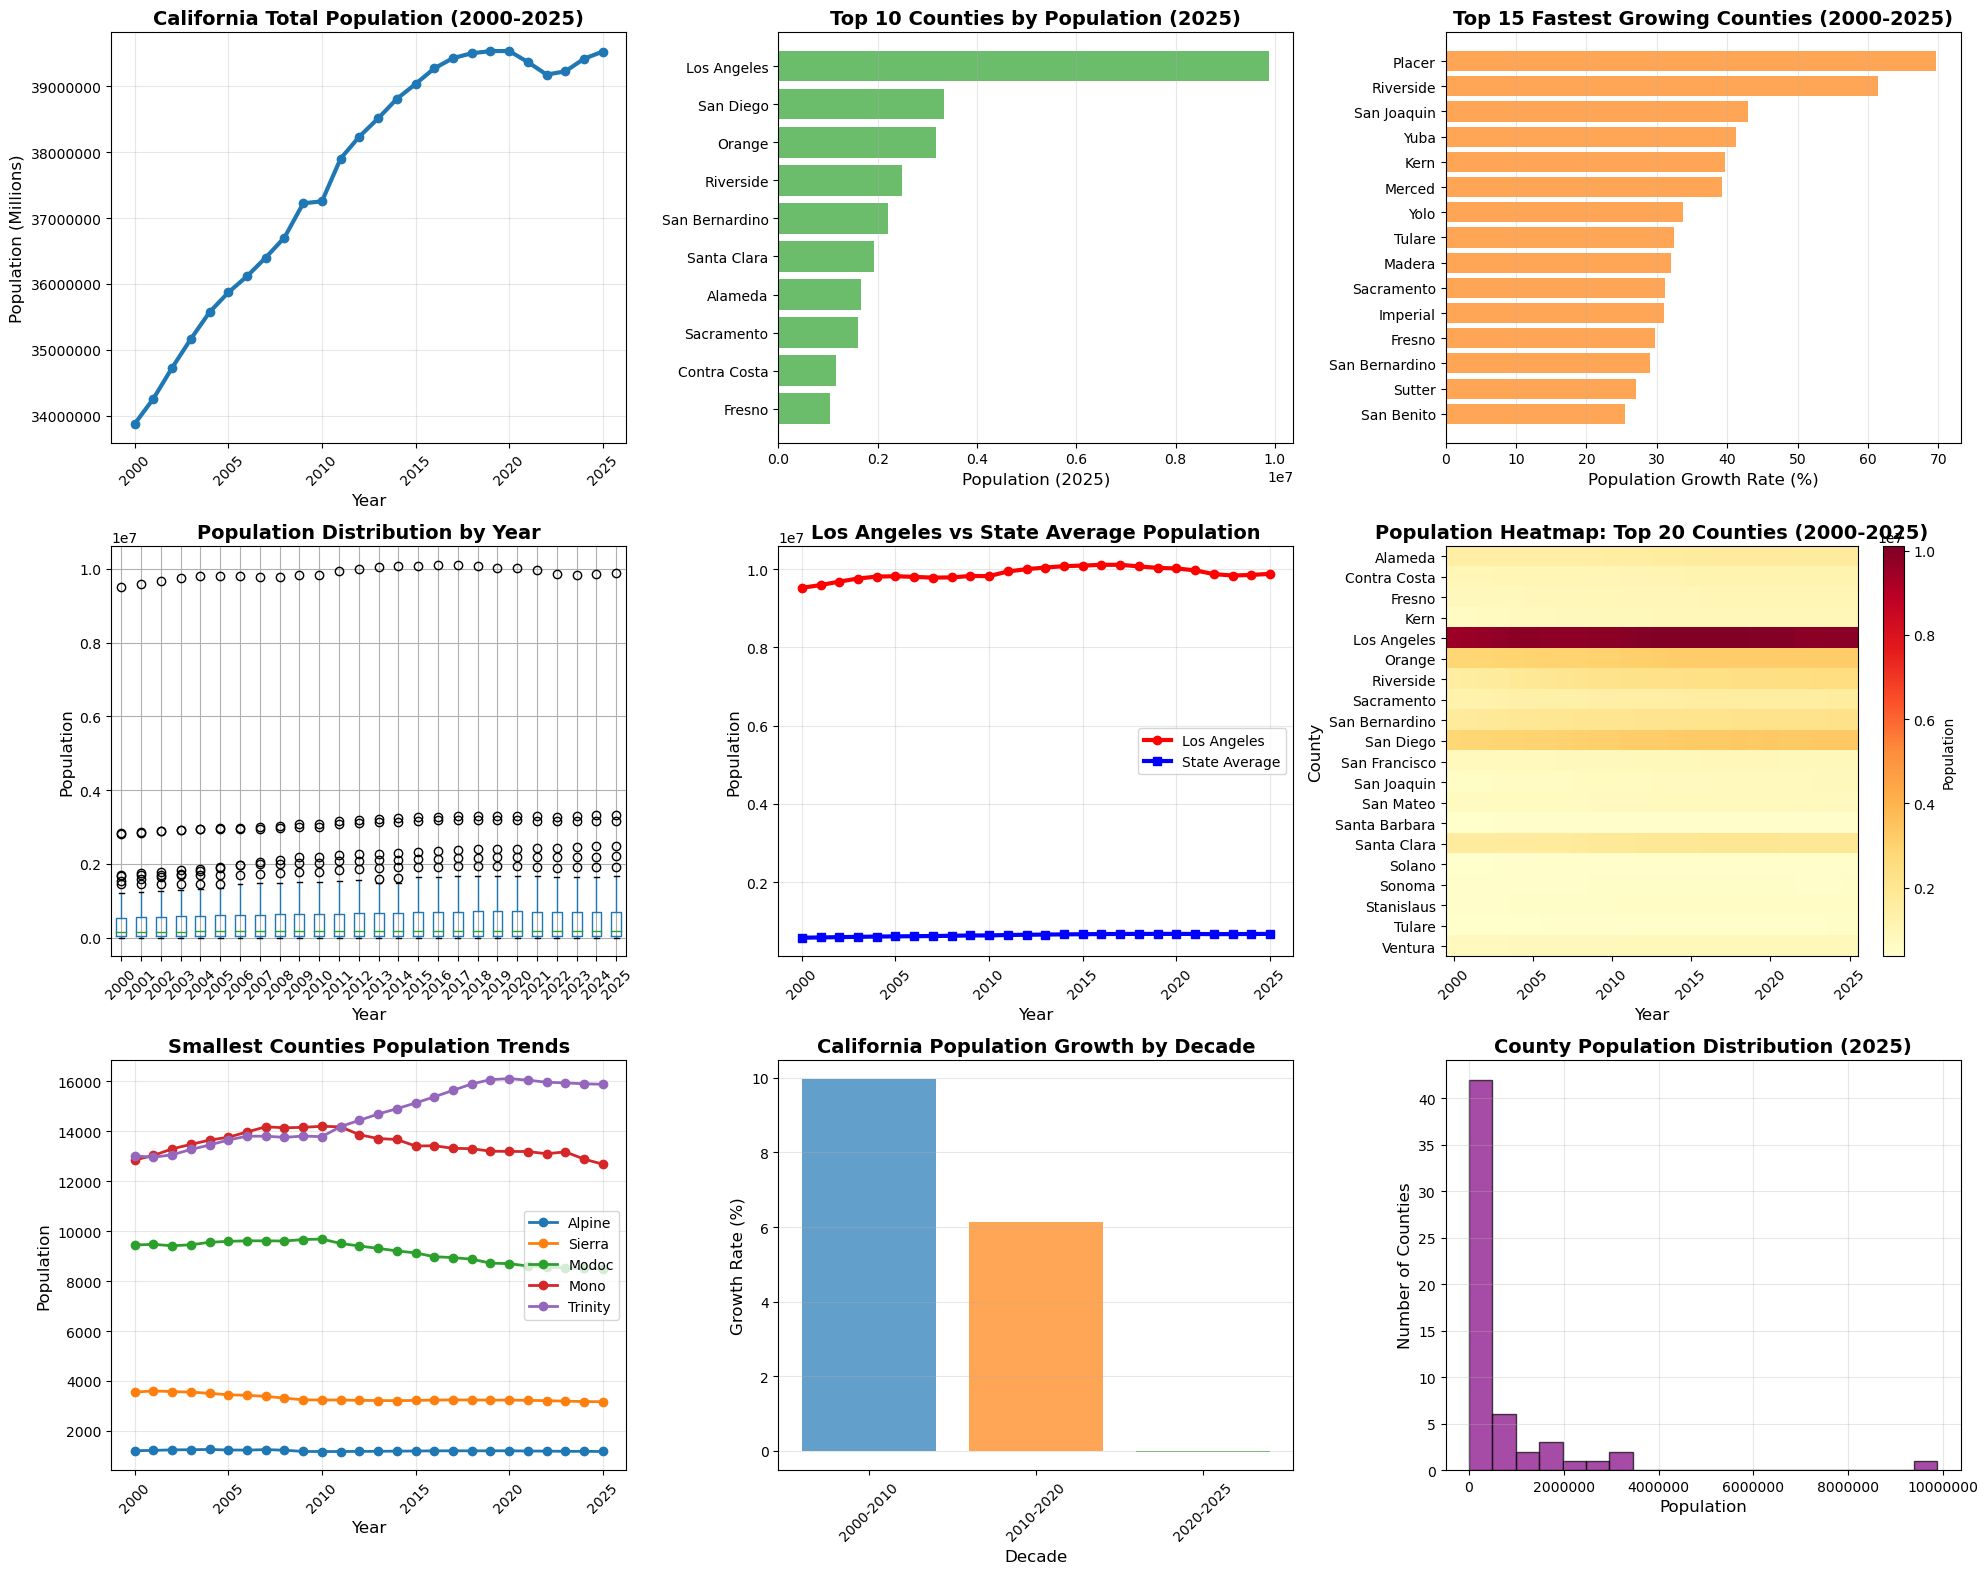

✅ All visualizations complete using long format data!


In [26]:
# Create comprehensive visualizations using the long format data
print('=' * 80)
print('POPULATION DATA VISUALIZATIONS (LONG FORMAT)')
print('=' * 80)

# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. California Total Population Over Time
plt.subplot(3, 3, 1)
ca_total_by_year = population_long.groupby('Year')['Population'].sum()
plt.plot(ca_total_by_year.index, ca_total_by_year.values, linewidth=3, color='#1f77b4', marker='o', markersize=6)
plt.title('California Total Population (2000-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Millions)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# 2. Top 10 Counties in 2025
plt.subplot(3, 3, 2)
top_10_2025 = population_long[population_long['Year'] == 2025].nlargest(10, 'Population')
plt.barh(range(len(top_10_2025)), top_10_2025['Population'], color='#2ca02c', alpha=0.7)
plt.yticks(range(len(top_10_2025)), top_10_2025['COUNTY'])
plt.xlabel('Population (2025)', fontsize=12)
plt.title('Top 10 Counties by Population (2025)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# 3. Population Growth Rate by County (2000-2025)
plt.subplot(3, 3, 3)
growth_rates = []
county_names = []
for county in population_long['COUNTY'].unique():
    county_data = population_long[population_long['COUNTY'] == county].sort_values('Year')
    if len(county_data) > 1:
        growth_rate = ((county_data['Population'].iloc[-1] - county_data['Population'].iloc[0]) / 
                       county_data['Population'].iloc[0]) * 100
        growth_rates.append(growth_rate)
        county_names.append(county)

# Plot top 15 fastest growing counties
top_growth = sorted(zip(county_names, growth_rates), key=lambda x: x[1], reverse=True)[:15]
counties, rates = zip(*top_growth)
plt.barh(range(len(counties)), rates, color='#ff7f0e', alpha=0.7)
plt.yticks(range(len(counties)), counties)
plt.xlabel('Population Growth Rate (%)', fontsize=12)
plt.title('Top 15 Fastest Growing Counties (2000-2025)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# 4. Population Distribution by Year (Box Plot)
plt.subplot(3, 3, 4)
population_long.boxplot(column='Population', by='Year', ax=plt.gca())
plt.title('Population Distribution by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.suptitle('')  # Remove default title

# 5. Los Angeles County vs State Average
plt.subplot(3, 3, 5)
la_data = population_long[population_long['COUNTY'] == 'Los Angeles']
state_avg = population_long.groupby('Year')['Population'].mean()
plt.plot(la_data['Year'], la_data['Population'], linewidth=3, color='red', label='Los Angeles', marker='o')
plt.plot(state_avg.index, state_avg.values, linewidth=3, color='blue', label='State Average', marker='s')
plt.title('Los Angeles vs State Average Population', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 6. Population Heatmap (Top 20 Counties, 2000-2025)
plt.subplot(3, 3, 6)
# Get top 20 counties by 2025 population
top_20_counties = population_long[population_long['Year'] == 2025].nlargest(20, 'Population')['COUNTY'].tolist()
heatmap_data = population_long[population_long['COUNTY'].isin(top_20_counties)]
heatmap_pivot = heatmap_data.pivot(index='COUNTY', columns='Year', values='Population')

# Create heatmap
im = plt.imshow(heatmap_pivot.values, cmap='YlOrRd', aspect='auto')
plt.title('Population Heatmap: Top 20 Counties (2000-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.xticks(range(0, len(heatmap_pivot.columns), 5), heatmap_pivot.columns[::5], rotation=45)
plt.yticks(range(len(heatmap_pivot.index)), heatmap_pivot.index)
plt.colorbar(im, label='Population')

# 7. Smallest Counties Population Trend
plt.subplot(3, 3, 7)
smallest_counties = population_long[population_long['Year'] == 2025].nsmallest(5, 'Population')['COUNTY'].tolist()
for county in smallest_counties:
    county_data = population_long[population_long['COUNTY'] == county]
    plt.plot(county_data['Year'], county_data['Population'], linewidth=2, marker='o', label=county)
plt.title('Smallest Counties Population Trends', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 8. Population Growth by Decade
plt.subplot(3, 3, 8)
decade_growth = []
decades = ['2000-2010', '2010-2020', '2020-2025']
for decade in [(2000, 2010), (2010, 2020), (2020, 2025)]:
    start_year, end_year = decade
    start_pop = population_long[population_long['Year'] == start_year]['Population'].sum()
    end_pop = population_long[population_long['Year'] == end_year]['Population'].sum()
    growth = ((end_pop - start_pop) / start_pop) * 100
    decade_growth.append(growth)

plt.bar(decades, decade_growth, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
plt.title('California Population Growth by Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 9. County Population Distribution (2025)
plt.subplot(3, 3, 9)
pop_2025 = population_long[population_long['Year'] == 2025]['Population']
plt.hist(pop_2025, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('County Population Distribution (2025)', fontsize=14, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

print('✅ All visualizations complete using long format data!')
print('=' * 80)